# Metoda przerzedzania

Napisz algorytm, który dla ustalonej niejednorodnej funkcji intensywności $\lambda(t)$ generuje czasy oczekiwania niejednorodnego procesu Poissona metodą przerzedzania.

Sprawdź poprawność jego działania weryfikując, że $N_t$~Poiss$(\int^t_0\lambda(s)ds)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
def thinning(lam_t, lam, T):
    t = 0
    I = 0
    S = [0]
    while t <= T:
        U1 = np.random.uniform(0, 1)
        t -= np.log(U1) / lam
        U2 = np.random.uniform(0, 1)
        if U2 <= lam_t(t) / lam:
            I += 1
            S.append(t)
    return S


def lam_t(t):
    return 2 + np.cos(t)

In [3]:
lam, T = 3, 20
rozrzedzanie = thinning(lam_t, lam, T)
calka = [scipy.integrate.quad(func=lam_t, a=0, b=t)[0] for t in np.linspace(0, T, 1000)]

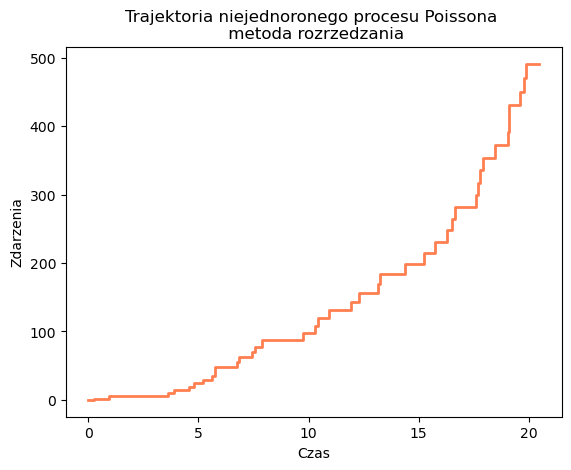

In [4]:
plt.step(rozrzedzanie, np.cumsum(rozrzedzanie), color="coral", lw=2)
plt.xlabel("Czas")
plt.ylabel("Zdarzenia")
plt.title("Trajektoria niejednoronego procesu Poissona \n metoda rozrzedzania")
plt.show()

In [5]:
def sym_od_jednorodnego(lam_t, T):
    t = 0
    I = 0
    S = []
    while t <= T:
        U = np.random.uniform(0, 1)
        t -= np.log(U)
        I += 1
        S.append(scipy.integrate.quad(func=lam_t, a=0, b=t)[0])
    return S

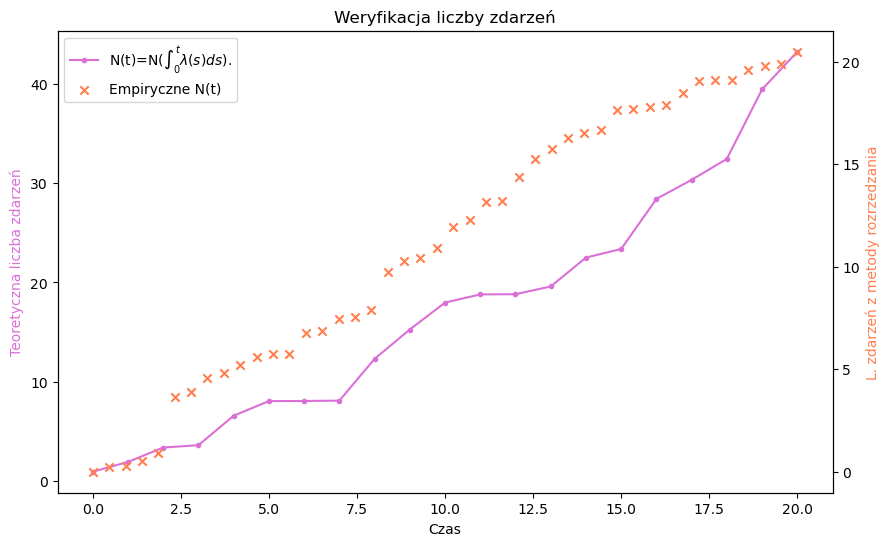

In [6]:
symulacja = sym_od_jednorodnego(lam_t, T)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(
    np.linspace(0, T, len(symulacja)),
    symulacja,
    label="N(t)=N$(\int^t_0\lambda(s)ds)$.",
    color="orchid",
    marker=".",
)
ax1.set_xlabel("Czas")
ax1.set_ylabel("Teoretyczna liczba zdarzeń", color="orchid")

ax2 = ax1.twinx()
ax2.scatter(
    np.linspace(0, T, len(rozrzedzanie)),
    rozrzedzanie,
    label="Empiryczne N(t)",
    color="coral",
    marker="x",
)
ax2.set_ylabel("L. zdarzeń z metody rozrzedzania", color="coral")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")
plt.title("Weryfikacja liczby zdarzeń")
plt.show()

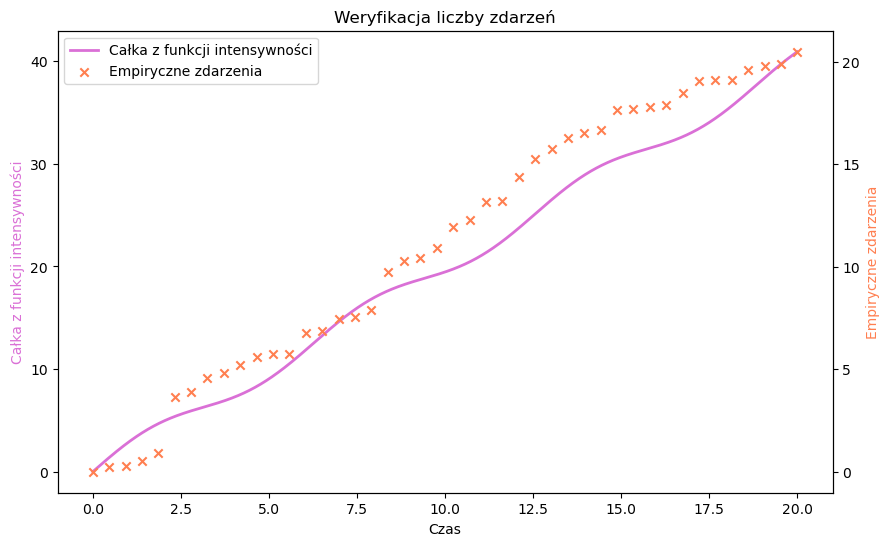

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(
    np.linspace(0, T, 1000),
    calka,
    label="Całka z funkcji intensywności",
    color="orchid",
    lw=2,
)
ax1.set_xlabel("Czas")
ax1.set_ylabel("Całka z funkcji intensywności", color="orchid")

ax2 = ax1.twinx()
ax2.scatter(
    np.linspace(0, T, len(rozrzedzanie)),
    rozrzedzanie,
    label="Empiryczne zdarzenia",
    color="coral",
    marker="x",
)
ax2.set_ylabel("Empiryczne zdarzenia", color="coral")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

plt.title("Weryfikacja liczby zdarzeń")
plt.show()